# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [8]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [9]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
from google.colab import files

#Upload the CSV file
uploaded = files.upload()


Saving foodhub_order.csv to foodhub_order (1).csv


In [11]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()



,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [5]:
# Get the shape to be able to print the rows and columns.
num_rows, num_columns = df.shape

# Printing the rows and columns as num_rows and num_columns
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 1898
Number of columns: 9


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:

# Checking for missing values
missing_values = df.isnull().sum()

# Printing the msising values as a count
print("Missing values count for each column:")
print(missing_values)

Missing values count for each column:
order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
#Summary for food prep time
food_preparation_summary = df['food_preparation_time'].describe()

# minimum, mean, and maximum values
min_preparation_time = food_preparation_summary['min']
mean_preparation_time = food_preparation_summary['mean']
max_preparation_time = food_preparation_summary['max']

# print the results
print("Minimum food preparation time:", min_preparation_time)
print("Average food preparation time:", mean_preparation_time)
print("Maximum food preparation time:", max_preparation_time)

Minimum food preparation time: 20.0
Average food preparation time: 27.371970495258168
Maximum food preparation time: 35.0


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Count the number of orders rated as Not given
not_given_ratings_count = (df['rating'] == 'Not given').sum()

print("Number of orders rated as 'Not given':", not_given_ratings_count)

Number of orders rated as 'Not given': 736


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

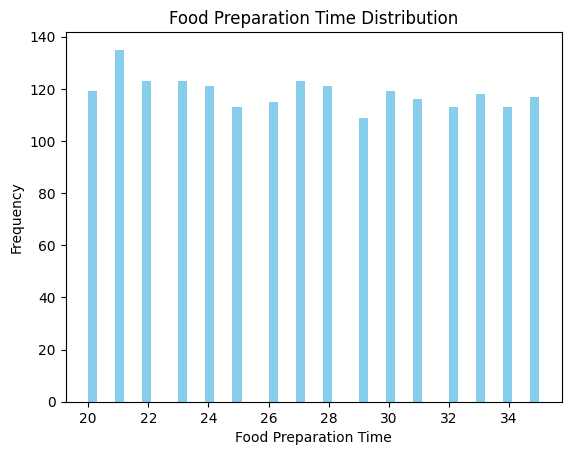

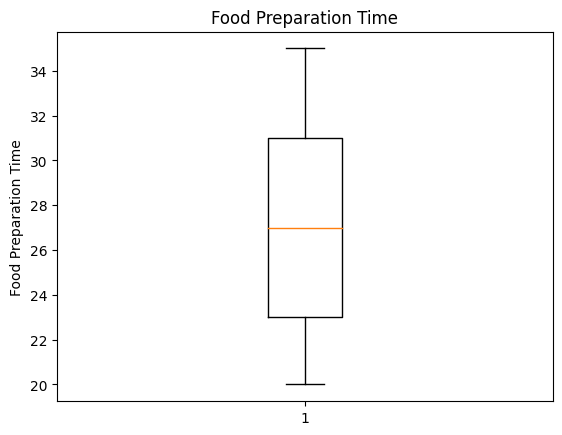

In [18]:
import matplotlib.pyplot as plt

# Histogram for food prep time
plt.hist(df['food_preparation_time'], bins=50, color='skyblue')
plt.xlabel('Food Preparation Time')
plt.ylabel('Frequency')
plt.title('Food Preparation Time Distribution')
plt.show()

# Boxplot for food prep time
plt.boxplot(df['food_preparation_time'])
plt.ylabel('Food Preparation Time')
plt.title('Food Preparation Time')
plt.show()

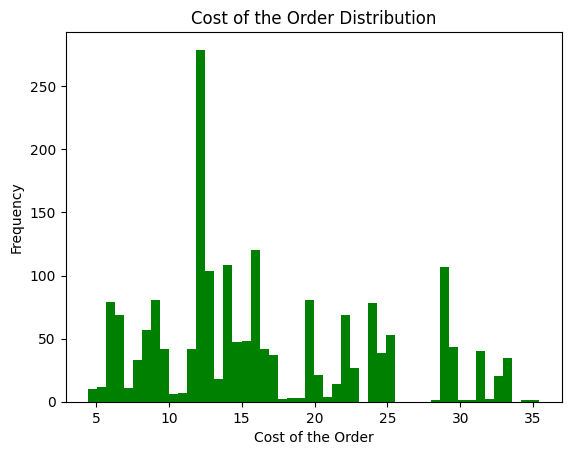

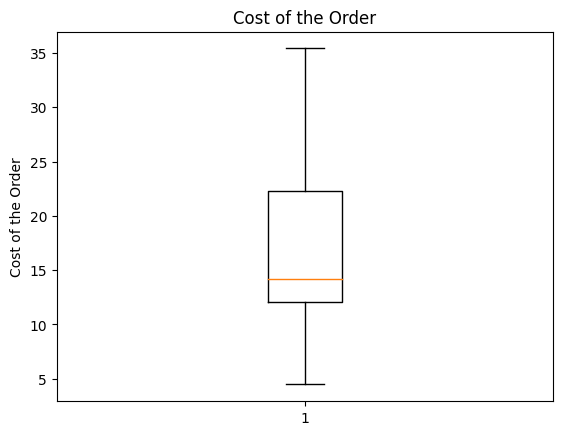

In [19]:
# Histogram for order cost
plt.hist(df['cost_of_the_order'], bins=50, color='green')
plt.xlabel('Cost of the Order')
plt.ylabel('Frequency')
plt.title('Cost of the Order Distribution')
plt.show()

# Boxplot for order cost
plt.boxplot(df['cost_of_the_order'])
plt.ylabel('Cost of the Order')
plt.title('Cost of the Order')
plt.show()

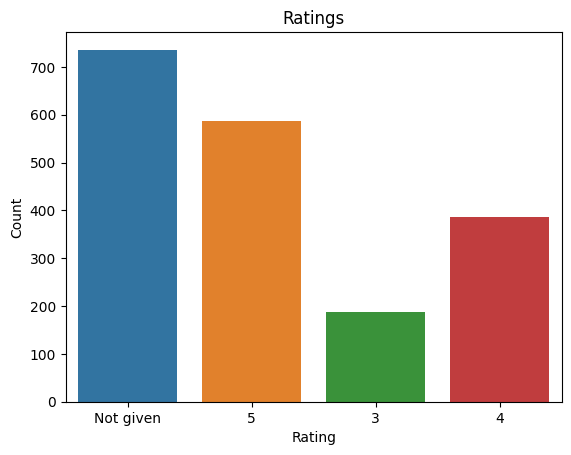

In [ ]:
import seaborn as sns

# Countplot for rating
sns.countplot(x='rating', data=df)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Ratings')
plt.show()

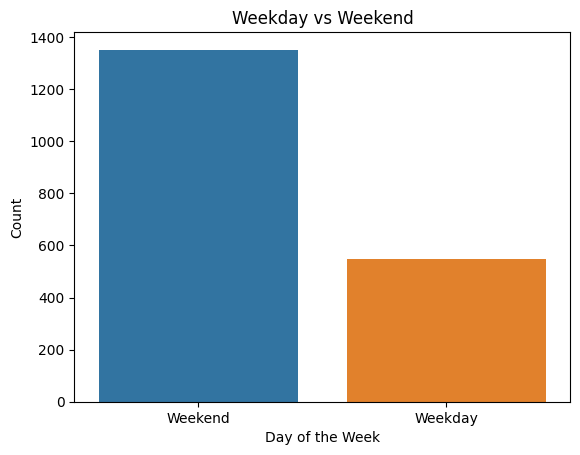

In [ ]:
# Countplot for weekend vs weekday
sns.countplot(x='day_of_the_week', data=df)
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Weekday vs Weekend')
plt.xticks(rotation=0)
plt.show()

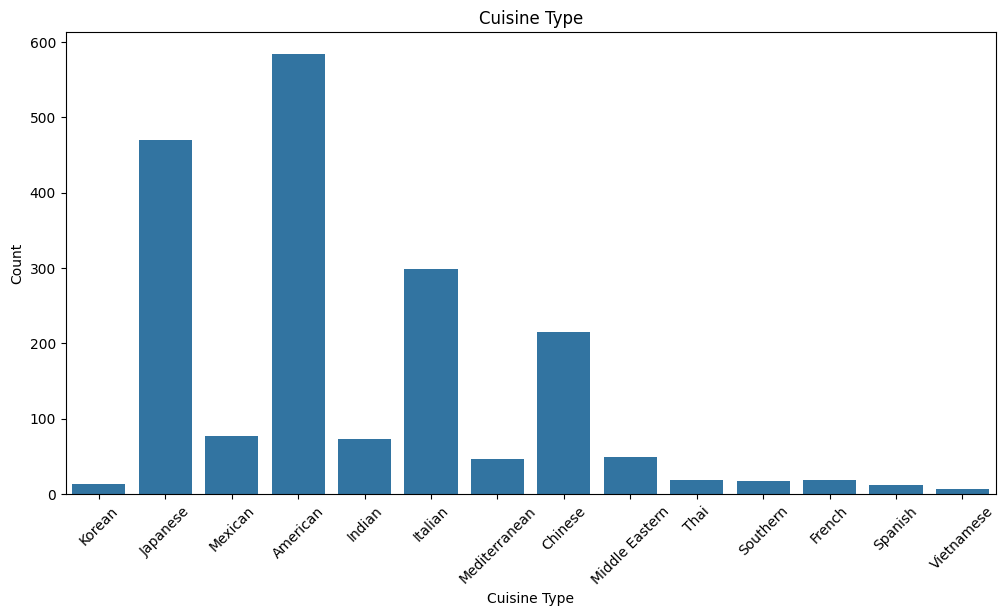

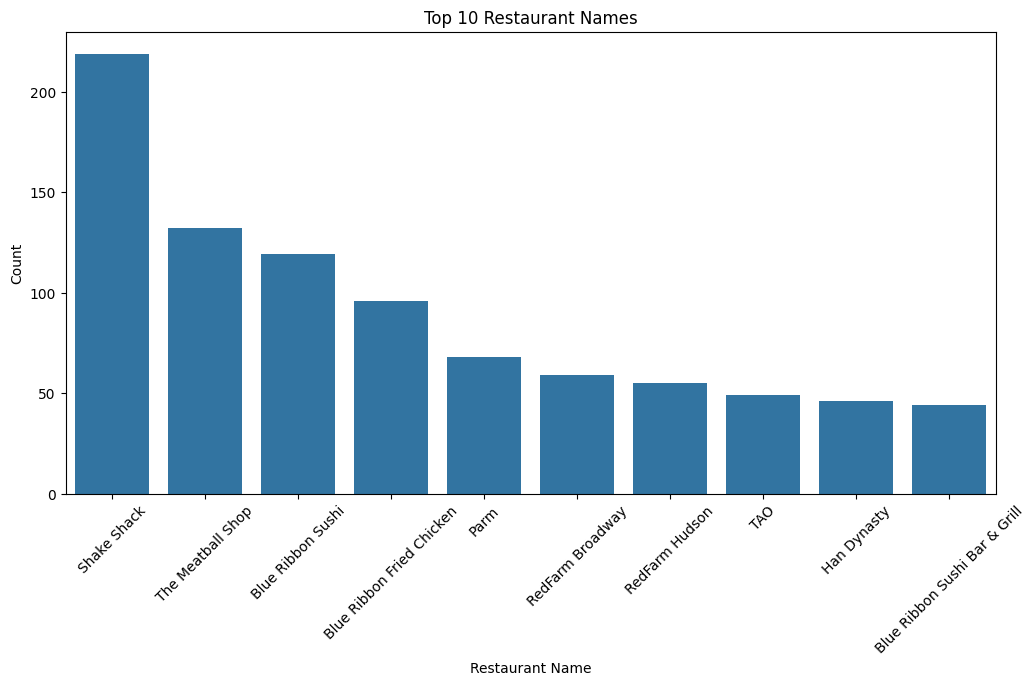

In [20]:
#Countplot for cuisine type
plt.figure(figsize=(12, 6))
sns.countplot(x='cuisine_type', data=df)
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.title('Cuisine Type')
plt.xticks(rotation=45)
plt.show()

#top 10 restaurants by count
top_10_restaurants = df['restaurant_name'].value_counts().nlargest(10)

# Filter the DataFrame for only these top 10 restaurants
df_top_10_restaurants = df[df['restaurant_name'].isin(top_10_restaurants.index)]

#Countplot for the top 10 restaurants
plt.figure(figsize=(12, 6))
sns.countplot(x='restaurant_name', data=df_top_10_restaurants, order=top_10_restaurants.index)
plt.xlabel('Restaurant Name')
plt.ylabel('Count')
plt.title('Top 10 Restaurant Names')
plt.xticks(rotation=45)
plt.show()

#top 10 customers by order count
top_10_customers = df['customer_id'].value_counts().nlargest(10)

# Filter for only the top 10 customers
df_top_10_customers = df[df['customer_id'].isin(top_10_customers.index)]


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
#order count for each restaurant
restaurant_order_counts = df['restaurant_name'].value_counts()

#top 5 restaurants
top_5_restaurants = restaurant_order_counts.nlargest(5)

#top 5 restaurants and their order counts
print("Top 5 Restaurants by Number of Orders:")
print(top_5_restaurants)


Top 5 Restaurants by Number of Orders:
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Filter for orders placed on weekends
weekend_orders = df[df['day_of_the_week'].isin(['Weekend'])]

#order count for each cuisine type on weekends
cuisine_order_counts_weekends = weekend_orders['cuisine_type'].value_counts()

#most popular cuisine on weekends
most_popular_cuisine_weekends = cuisine_order_counts_weekends.idxmax()

#most popular cuisine on weekends and its order count
print("Most Popular Cuisine on Weekends:", most_popular_cuisine_weekends)
print("Order Count for the Most Popular Cuisine on Weekends:", cuisine_order_counts_weekends.max())


Most Popular Cuisine on Weekends: American
Order Count for the Most Popular Cuisine on Weekends: 415


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
#orders with cost greater than $20
cost_more_than_20 = df[df['cost_of_the_order'] > 20]

#percentage of orders costing more than $20
percentage_more_than_20 = (len(cost_more_than_20) / len(df)) * 100

#print the percentage
print(f"Percentage of orders costing more than $20: {percentage_more_than_20:.2f}%")


Percentage of orders costing more than $20: 29.24%


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
#Mean order delivery time and round it to 2 decimal places
mean_delivery_time = round(df['delivery_time'].mean(), 2)

#Mean order delivery time with "minutes"
print("Mean order delivery time:", f"{mean_delivery_time:.2f} minutes")

Mean order delivery time: 24.16 minutes


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
#Number of orders per customer
customer_order_counts = df['customer_id'].value_counts()

#Top 5 customers
top_5_customers = customer_order_counts.nlargest(5)

#Print the IDs of the top 5 customers and their order counts
print("Top 5 Customers by Number of Orders:")
for customer_id, order_count in zip(top_5_customers.index, top_5_customers.values):
    print(f"Customer ID: {customer_id}, Orders: {order_count}")

Top 5 Customers by Number of Orders:
Customer ID: 52832, Orders: 13
Customer ID: 47440, Orders: 10
Customer ID: 83287, Orders: 9
Customer ID: 250494, Orders: 8
Customer ID: 259341, Orders: 7


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


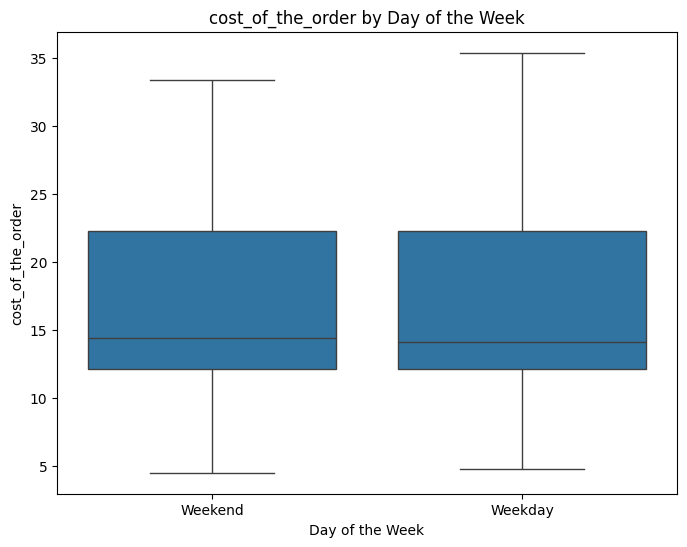

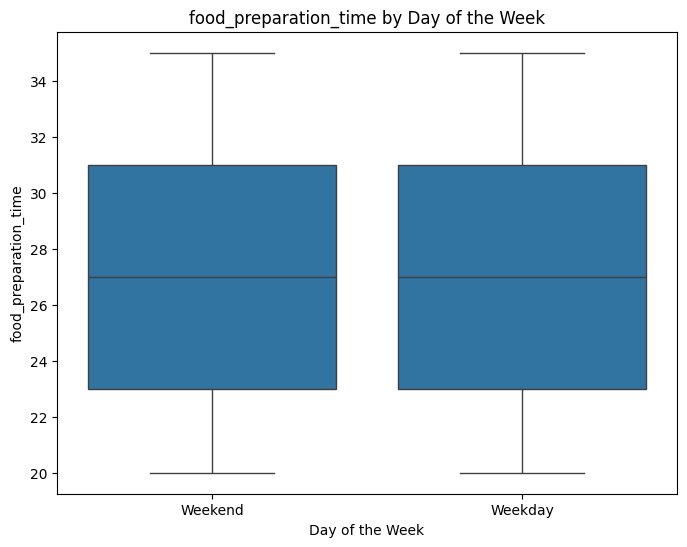

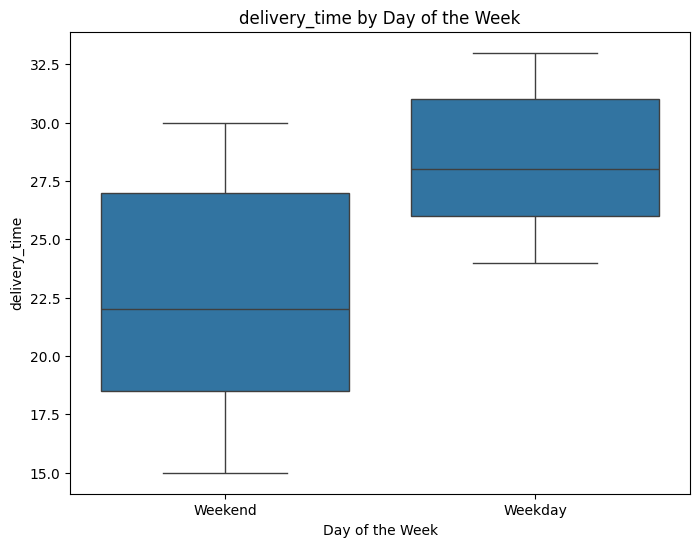

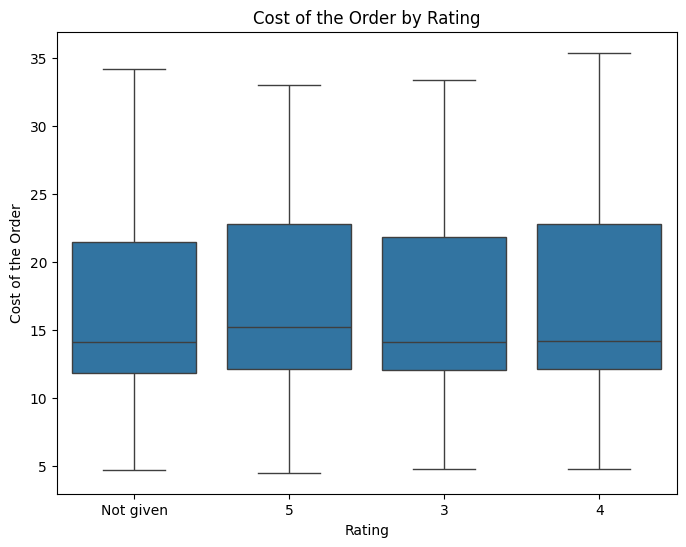

In [22]:
# order cost, food prep time, and delivery time for scatter plots
numerical_variables = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']

#Scatter plot
#sns.pairplot(df[numerical_variables])
#plt.suptitle('Numerical Variables', y=1.02)
#plt.show()

#Box Plots by days of the week
for numerical_variable in numerical_variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='day_of_the_week', y=numerical_variable, data=df)
    plt.title(f'{numerical_variable} by Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel(numerical_variable)
    plt.show()

#Box plot for order cost and rating
plt.figure(figsize=(8, 6))
sns.boxplot(x='rating', y='cost_of_the_order', data=df)
plt.title('Cost of the Order by Rating')
plt.xlabel('Rating')
plt.ylabel('Cost of the Order')
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
#Converting rating to int and getting rid of not given
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

#Rating count and average rating for each restaurant
restaurant_ratings = df.groupby('restaurant_name').agg(
    rating_count=pd.NamedAgg(column='rating', aggfunc='count'),
    average_rating=pd.NamedAgg(column='rating', aggfunc='mean')
)

#Restaurants based on rating criteria
eligible_restaurants = restaurant_ratings[(restaurant_ratings['rating_count'] > 50) &
                                          (restaurant_ratings['average_rating'] > 4)]

print("Restaurants Fulfilling the Criteria for Promotional Offer:")
print(eligible_restaurants)



Restaurants Fulfilling the Criteria for Promotional Offer:
                           rating_count  average_rating
restaurant_name                                        
Blue Ribbon Fried Chicken            64        4.328125
Blue Ribbon Sushi                    73        4.219178
Shake Shack                         133        4.278195
The Meatball Shop                    84        4.511905


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [7]:
#Charge for orders > $20
charge_above_20 = 0.25 * df[df['cost_of_the_order'] > 20]['cost_of_the_order'].sum()

#Charge for orders > $5 and <= $20
charge_between_5_and_20 = 0.15 * df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]['cost_of_the_order'].sum()

#Total revenue
total_revenue = df['cost_of_the_order'].sum()

#Net revenue
net_revenue = total_revenue - (charge_above_20 + charge_between_5_and_20)

#Print net revenue
print("Net revenue generated by the company across all orders:", net_revenue)


Net revenue generated by the company across all orders: 25148.517


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [6]:
#Total time for each order with food prep time + delivery time
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

#Percentage of orders that take more than 60 minutes
orders_more_than_60_minutes = df[df['total_delivery_time'] > 60].shape[0]
total_orders = df.shape[0]
percentage_more_than_60_minutes = (orders_more_than_60_minutes / total_orders) * 100

# Printing the percentage
print("Percentage of orders taking more than 60 minutes:", f"{percentage_more_than_60_minutes:.2f}%")


Percentage of orders taking more than 60 minutes: 10.54%


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
#Total delivery time for each order food prep + delivery time
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

#Separate weekdays and weekends
def categorize_day(day):
    if day in ['Weekday']:
        return 'Weekdays'
    else:
        return 'Weekends'

#create a new column 'day_category'
df['day_category'] = df['day_of_the_week'].apply(categorize_day)

#Mean delivery time for weekdays and weekends
mean_delivery_time_per_day = df.groupby('day_category')['total_delivery_time'].mean()

# Printing the mean delivery time for weekdays and weekends
print("Mean Delivery Time (in minutes) on Weekdays and Weekends:")
print(mean_delivery_time_per_day)


Mean Delivery Time (in minutes) on Weekdays and Weekends:
day_category
Weekdays    55.552102
Weekends    49.906736
Name: total_delivery_time, dtype: float64


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  delivery times are very high on both weekdays and weekends.
*  food prep time needs is too high.
*  american, japanese, and italian foods are the most popular with customers.
*  orders above $20 account for almost 30% of all orders.

### Recommendations:

*  Provide promotions on weekends for american, japanese, and italian takeout food to entice more people to buy the best sellers.
*  focus on improving delivery times and offer promotions to companies that can prepare food within 30 minutes every order. We could give them a discount of 2-5% on every order if they can reduce the prep time to an acceptable level.
*  Reduce the amount of orders that take 60minutes or more to complete as they are most likely to lose us repeat customers. This is unacceptable.
*  prioritize restaurants shown to the customer based on geo location and how far the delivery would be from them - prioritizing closer locations to customers for faster delivery times.

---